# Meteorite project

In [1]:
import pandas as pd
meteorite=pd.read_csv('Meteorie.csv')
meteorite

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [2]:
meteorite['fall'] = meteorite['fall'].replace({'Found':1,'Fell':0})

# Exclude all class except the top 5

In [3]:
final_data=meteorite.drop(columns=['GeoLocation','id','nametype','name'])
import pandas as pd

classes_to_be_kept = ['L6', 'H5', 'L5','H6','H4']

final_data = final_data[final_data['recclass'].isin(classes_to_be_kept)]
final_data = final_data.reset_index()
final_data=final_data.drop(columns=['index'])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28962 entries, 0 to 28961
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   recclass  28962 non-null  object 
 1   mass (g)  28949 non-null  float64
 2   fall      28962 non-null  int64  
 3   year      28804 non-null  float64
 4   reclat    24909 non-null  float64
 5   reclong   24909 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
value_counts = final_data['recclass'].value_counts()
value_counts

recclass
L6    8285
H5    7142
L5    4796
H6    4528
H4    4211
Name: count, dtype: int64

# Dealing with nan values using SimpleImputer with mean strategy

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
 
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 
num_cols = ['mass (g)', 'year', 'reclat', 'reclong']
cat_col = ['recclass']
 
final_data[num_cols] = imputer_num.fit_transform(final_data[num_cols]) 
final_data[cat_col] = imputer_cat.fit_transform(final_data[cat_col])


In [6]:
print('Mass null value: ',final_data['mass (g)'].isnull().sum())
print('Year null value: ',final_data['year'].isnull().sum())
print('Latitude null value: ',final_data['reclat'].isnull().sum())
print('Longitude null value: ',final_data['reclong'].isnull().sum())
print('reclass null value: ',final_data['recclass'].isnull().sum())

Mass null value:  0
Year null value:  0
Latitude null value:  0
Longitude null value:  0
reclass null value:  0


# Dividing Data into X and Y

In [7]:
X = final_data.drop(columns=['fall']) 
Y = final_data['fall']

# Encoding reclass using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(X[['recclass']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['recclass'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

train = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

X = train
X = X.drop(columns=['recclass'])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Scaling using StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std= scaler.fit_transform(X_train) 
y_std = Y_train.to_numpy()

In [11]:
x_std= pd.DataFrame(x_std,columns = ['mass (g)','year','reclat','reclong','recclass_H4','recclass_H5','recclass_H6','recclass_L5','recclass_L6'])

In [12]:
x_std.describe().round(3) 

,mass (g),year,reclat,reclong,recclass_H4,recclass_H5,recclass_H6,recclass_L5,recclass_L6
count,23169.000,23169.000,23169.000,23169.000,23169.000,23169.000,23169.000,23169.000,23169.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.071,-17.345,-1.060,-3.111,-0.411,-0.569,-0.433,-0.449,-0.632
25%,-0.071,-0.301,-0.796,-0.658,-0.411,-0.569,-0.433,-0.449,-0.632
50%,-0.070,0.233,-0.682,0.001,-0.411,-0.569,-0.433,-0.449,-0.632
75%,-0.064,0.554,1.024,1.230,-0.411,-0.569,-0.433,-0.449,1.583
max,88.349,1.088,2.961,1.482,2.431,1.758,2.309,2.228,1.583


# RandomForestClassifier for fitting data

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_std, y_std) 

RandomForestClassifier(random_state=42)

# Prediction 

In [14]:
xt_std= scaler.fit_transform(X_test) 
predictions = rf_classifier.predict(xt_std)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions)

print("Classification Report:")
print(report)

kappa_rf = cohen_kappa_score(Y_test, predictions)

print("Cohen's Kappa:", kappa_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       139
           1       1.00      1.00      1.00      5654

    accuracy                           0.99      5793
   macro avg       0.92      0.90      0.91      5793
weighted avg       0.99      0.99      0.99      5793

Cohen's Kappa: 0.8224173252535372


# Evaluation

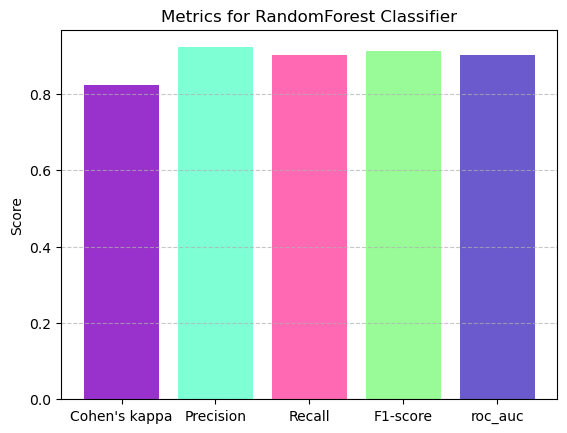

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions, average='macro')
recall = recall_score(Y_test, predictions, average='macro')
f1 = f1_score(Y_test, predictions, average='macro')
conf_matrix = confusion_matrix(Y_test, predictions)
roc_auc = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, predictions)

labels = ['Cohen\'s kappa', 'Precision', 'Recall', 'F1-score','roc_auc']
values = [kappa_rf, precision, recall, f1,roc_auc]
plt.grid(axis='y', linestyle='--', alpha=0.7)
colors = ['darkorchid', 'aquamarine', 'hotpink', 'palegreen', 'slateblue']
plt.bar(labels, values , color=colors)
plt.title('Metrics for RandomForest Classifier')
plt.ylabel('Score')
plt.show()

# The Most effective feature
SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

 99%|===================| 11516/11586 [00:25<00:00]        C:\Users\Admin\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


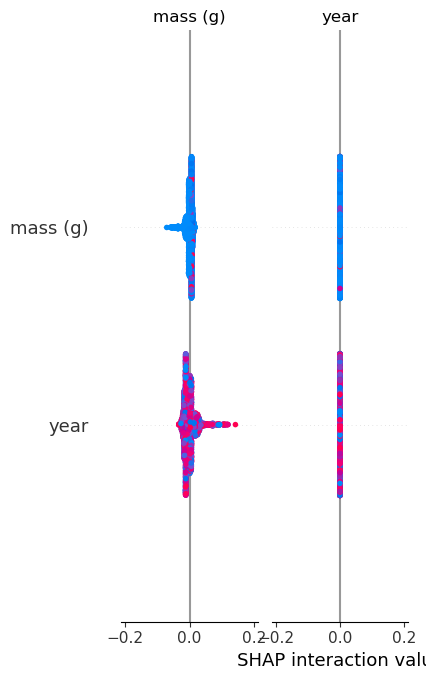

In [17]:
import shap

# Create an explainer object
explainer = shap.Explainer(rf_classifier, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [18]:
#pip install shap

# Trying To classify data with the "year" and "mass" columns

In [19]:
x_new = x_std.drop(columns = ['reclat','reclong','recclass_H4',"recclass_H5","recclass_H6","recclass_L5","recclass_L6"])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_new, y_std) 


RandomForestClassifier(random_state=42)

In [20]:
X_test_new = X_test.drop(columns = ['reclat','reclong','recclass_H4',"recclass_H5","recclass_H6","recclass_L5","recclass_L6"])
xt_std_new= scaler.fit_transform(X_test_new) 
predictions_new = rf_classifier.predict(xt_std_new)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions_new)

print("Classification Report:")
print(report)

kappa_rf_new = cohen_kappa_score(Y_test, predictions_new)
print("Cohen's Kappa:", kappa_rf_new)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       139
           1       0.99      0.99      0.99      5654

    accuracy                           0.98      5793
   macro avg       0.81      0.75      0.77      5793
weighted avg       0.98      0.98      0.98      5793

Cohen's Kappa: 0.5480920397468001


# Evalution for second time

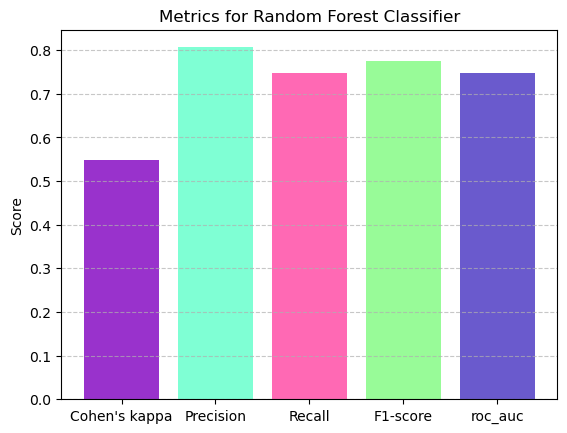

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

accuracy = accuracy_score(Y_test, predictions_new)
precision = precision_score(Y_test, predictions_new, average='macro')
recall = recall_score(Y_test, predictions_new, average='macro')
f1 = f1_score(Y_test, predictions_new, average='macro')
conf_matrix = confusion_matrix(Y_test, predictions_new)
roc_auc = roc_auc_score(Y_test, predictions_new)
fpr, tpr, thresholds = roc_curve(Y_test, predictions_new)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, predictions_new)

labels = ['Cohen\'s kappa', 'Precision', 'Recall', 'F1-score','roc_auc']
values = [kappa_rf_new, precision, recall, f1,roc_auc]
colors = ['darkorchid', 'aquamarine', 'hotpink', 'palegreen', 'slateblue']
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, values,color=colors)
plt.title('Metrics for Random Forest Classifier')
plt.ylabel('Score')
plt.show()

In [23]:
#Evaluate the classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

accuracy = accuracy_score(Y_test, predictions_new)
precision = precision_score(Y_test, predictions_new, average='macro')
recall = recall_score(Y_test, predictions_new, average='macro')
f1 = f1_score(Y_test, predictions_new, average='macro')
conf_matrix = confusion_matrix(Y_test, predictions_new)
roc_auc = roc_auc_score(Y_test, predictions_new)
fpr, tpr, thresholds = roc_curve(Y_test, predictions_new)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, predictions_new)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9808389435525634
Precision: 0.8064271255060729
Recall: 0.7480843765030423
F1-score: 0.7739881233776846
Confusion Matrix:
[[  70   69]
 [  42 5612]]
ROC AUC Score: 0.7480843765030424
